<h1> K - Means Clustering </h1>

In [4]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

n_samples is the total number of samples to generate.
centers is the number of centers to generate.
cluster_std is the standard deviation.

In [6]:
features, true_labels = make_blobs(n_samples=10000, 
                                   centers=3, 
                                   cluster_std=124.105111,
                                   random_state=3)

In [8]:
features[:5]

array([[ -36.86392013,  -21.03615623],
       [  27.63054887,  194.23324665],
       [  46.36677289, -132.73059136],
       [ 238.03871678,    7.49658161],
       [-174.0097504 ,  -66.12418199]])

In [9]:
true_labels[:5]

array([0, 2, 2, 2, 0])

In [10]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [11]:
scaled_features[:5]

array([[-0.30495152, -0.18451491],
       [ 0.22217217,  1.54047312],
       [ 0.37530635, -1.07954022],
       [ 1.94187203,  0.04412247],
       [-1.42586649, -0.54581245]])

init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [15]:
kmeans=KMeans(init="random",
              n_clusters=3,
              n_init=10,
              max_iter=300,
              random_state=3)

In [16]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=3)

In [18]:
#the lowest SSE value
kmeans.inertia_

9190.794396580692

In [20]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.8805983 ,  0.57598203],
       [ 0.92197652,  0.47360698],
       [-0.0312345 , -1.02976179]])

In [21]:
# The number of iterations required to converge
kmeans.n_iter_

16

In [22]:
kmeans.labels_[:5]

array([2, 1, 2, 1, 0])

In [25]:
#elbow method
kmeans_kwargs = { "init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 3,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

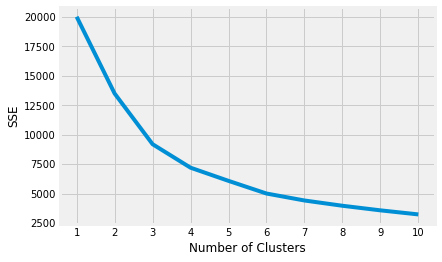

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

<h2> Reference: https://realpython.com/k-means-clustering-python/ </h2>